# TODO
## add interpretation

In [1]:
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [2]:
label_dict = {"e": "Skills and Hobbies",
              "h": "Miscellaneous: Government Documents",
              "k":  "Fiction: General",
              "n": "Fiction: Adventure",
              "p": "Fiction: Romance"}

In [3]:
def read(path):
    corpus=[]
    labels = []
    for file in os.listdir(path):
        filepath = os.path.join(path, file)
        with open(filepath, 'r') as i:
            # read content and remove newline char
            s = i.read().replace("\n","")
            corpus.append(s)
            labels.append(file[1])
    print(f"length corpus: {len(corpus)}")
    return corpus, labels

### a) Perform SVD with k = 2 on the training data and plot the first two dimensions of the latent document matrix U. Briefly describe what you observe.


length corpus: 95
Explained variance ratio: [0.08325744 0.21933445]
Singular values: [1849.29221369  468.82074881]
Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


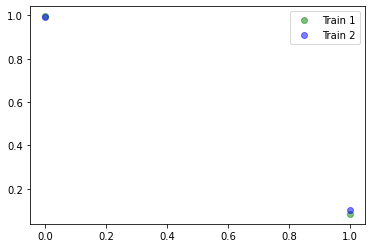

In [14]:
X_train, y_train = read("./HW-10-data/training")
vectorizer = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
svd = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer = Normalizer(copy = False)

lsa = make_pipeline(vectorizer,svd, normalizer)
X_SVD = lsa.fit_transform(X_train)
print(f"Explained variance ratio: {svd.explained_variance_ratio_}")
print(f"Singular values: {svd.singular_values_}")
X_SVD.shape
fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'og', alpha=0.5, label='Train 1')
ax.plot(X_SVD[1], 'ob', alpha=0.5, label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

The observable plot for the first two documents show a strong similarity for the SVD plot. 

### Load the test data, transform the documents into the latent vector space of the training model from a) and plot the resulting data into the same figure as a) but make sure they are distinguishable.


length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


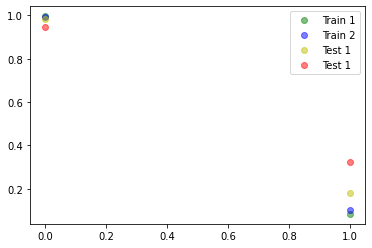

In [15]:
X_test, y_test = read("./HW-10-data/test")
X_SVD_test = lsa.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD[0], 'og', alpha=0.5, label='Train 1')
ax.plot(X_SVD[1], 'ob', alpha=0.5, label='Train 2')
ax.plot(X_SVD_test[0], 'oy', alpha=0.5, label="Test 1")
ax.plot(X_SVD_test[1], 'or', alpha=0.5, label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

Additional to the two plots of the first part, which are very similar, we observe a slightly difference with respect to the two dimension. This can be interpreted as difference of the documents, even though they rely to the same label as the train documents.

### Remove stopwords using a stopword list (this list can be found in the file stopwords.txt). Run again SVD and plot the training and test documents. Briefly describe differences to the plot in 1b)

In [6]:
def read_stopwords():
    p = "./HW-10-data/stopwords.txt"
    with open(p) as file:
        return file.read().split("\n")
stopwords = read_stopwords()

length corpus: 95


C:\Users\fmeyer\Anaconda3\envs\smolt\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'll', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Topic Doc 1: Skills and Hobbies
Topic Doc 2: Skills and Hobbies


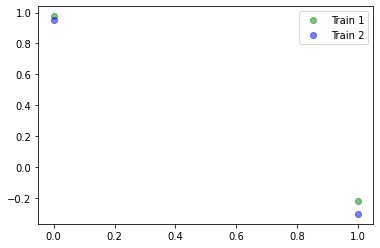

In [16]:
X_train, y_train = read("./HW-10-data/training")
vectorizer2 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
svd2 = TruncatedSVD(n_components=2,n_iter=50, random_state=42)
normalizer2 = Normalizer(copy = False)
lsa2 = make_pipeline(vectorizer2,svd2, normalizer2)
X_SVD2 = lsa2.fit_transform(X_train)
X_SVD2.shape
fig, ax = plt.subplots()
ax.plot(X_SVD2[0], 'og', alpha=0.5, label='Train 1')
ax.plot(X_SVD2[1], 'ob', alpha=0.5, label='Train 2')
ax.legend()
print(f"Topic Doc 1: {label_dict[y_train[0]]}")
print(f"Topic Doc 2: {label_dict[y_train[1]]}")

Removing stopwords leads to a slightly greater difference of the documents. This is not surprising, as we remove many similar words from both documents. The remaining words are "rarer" in general w.r.t. the language and thus less likely to occur in both documents, leading to greater differences.

length corpus: 50
Topic Train 1: Skills and Hobbies
Topic Train 2: Skills and Hobbies
Topic Test 1: Skills and Hobbies
Topic Test 2: Skills and Hobbies


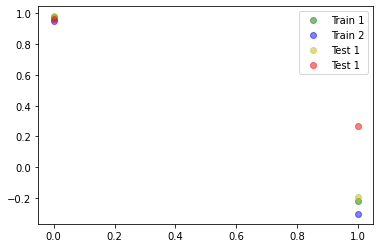

In [17]:
X_test, y_test = read("./HW-10-data/test")

X_SVD_test2 = lsa2.transform(X_test)

fig, ax = plt.subplots()
ax.plot(X_SVD2[0], 'og', alpha=0.5, label='Train 1')
ax.plot(X_SVD2[1], 'ob', alpha=0.5, label='Train 2')
ax.plot(X_SVD_test2[0], 'oy', alpha=0.5, label="Test 1")
ax.plot(X_SVD_test2[1], 'or', alpha=0.5, label="Test 1")
ax.legend()

print(f"Topic Train 1: {label_dict[y_train[0]]}")
print(f"Topic Train 2: {label_dict[y_train[1]]}")
print(f"Topic Test 1: {label_dict[y_test[0]]}")
print(f"Topic Test 2: {label_dict[y_test[1]]}")

Similar to the observations in the last subtask, the test docs diverge even more, for the same reasons as stated before

### 2) LDA  
As I problems running GibbsLDA on my system, I used scikit learns implementation, which differs slightly as it uses variational interference instead of Gibbs sampling. This might lead to slightly different results, but in general should yield similar reasonable results

In [9]:
def get_n_most_likely_words(vocab, lda_model, n=100):
    res =  {}
    for i, topic in enumerate(lda_model.components_):
        topic_dict = {}
        # get position of n highest values
        positions = topic.argsort()[-n:][::-1]
        # get words for n highest positions
        words = [vocab[i] for i in positions]
        res[i] = words
    return res
        # use for evaluation
        #for e, position in enumerate(positions):
        #    # create in json format
        #    topic_dict[e] = {words[e]: round(topic[position], 2)}
            #print(f"{e}: {words[e]}: {topic[position]}")
        #res[i] = topic_dict
    #return res
# TODO put results into dicts and merge them to get evolution of topics

def get_compact(history):
    res = {}
    # for every run
    for r, run in enumerate(history.keys()):
        
        # take each topic
        for topic in history[run].keys():
            try:
                res[topic].append(history[run][topic])
            except KeyError:
                res[topic] = [history[run][topic]]
    return res
def calc_overlap(compact_history):
    for topic in compact_history.keys():
        print(f"Topic {topic}:")
        for i in range(len(compact_history[topic])-1):
            over = overlap(compact_history[topic][i], compact_history[topic][i+1])
            print(f"Overlap run {i} to run {i+1}: {over} ({over /len(compact_history[topic][i])} %)")


In [10]:
from sklearn.decomposition import LatentDirichletAllocation

X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer3 = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
X = vectorizer3.fit_transform(X_train)
lda = LatentDirichletAllocation(n_components=1, random_state=42, n_jobs=-1)
lda.fit(X)
vocab = {v: k for k, v in vectorizer3.vocabulary_.items()}
print(get_n_most_likely_words(vocab, lda, n=100))

length corpus: 95
{0: ['the', 'and', 'of', 'to', 'in', 'he', 'was', 'it', 'that', 'for', 'his', 'with', 'on', 'had', 'is', 'you', 'be', 'as', 'at', 'she', 'her', 'this', 'but', 'him', 'they', 'from', 'or', 'not', 'by', 'have', 'would', 'one', 'all', 'were', 'are', 'there', 'out', 'an', 'said', 'when', 'we', 'their', 'which', 'no', 'up', 'if', 'what', 'so', 'them', 'could', 'about', 'been', 'into', 'me', 'like', 'my', 'can', 'will', 'time', 'more', 'its', 'now', 'then', 'only', 'do', 'who', 'other', 'over', 'two', 'any', 'man', 'down', 'back', 'your', 'state', 'has', 'than', 'did', 'made', 'such', 'long', 'before', 'just', 'new', 'some', 'our', 'these', 'way', 'first', 'little', 'where', 'through', 'get', 'must', 'here', 'how', 'after', 'even', 'well', 'may']}


### First impression: Looks pretty reasonable, but obviously full of stopwords, thus not pretty useful as it is very "generic" for a language

In [23]:
from sklearn.decomposition import LatentDirichletAllocation
X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer4 = CountVectorizer(lowercase =True, stop_words=None, max_df=1.0, min_df=1)
X = vectorizer4.fit_transform(X_train)
vocab = {v: k for k, v in vectorizer4.vocabulary_.items()}
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, max_iter=20)
results = {}

print("NO TRAIN")
print(lda.components_)
lda.fit(X)
print("\n\n TRAIN")
print(lda.exp_dirichlet_component_)
print(lda.components_)
for i in range(1,10):
    #print(f"Running iter {i * lda.max_iter}")
    print("\n\n TRAIN")
    lda.fit(X)
    print(lda.exp_dirichlet_component_)
    print(lda.components_)
    results[i] = get_n_most_likely_words(vocab, lda, 100)
        
compact = get_compact(results)       
calc_overlap(compact)


length corpus: 95
NO TRAIN


AttributeError: 'LatentDirichletAllocation' object has no attribute 'components_'

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
X_train, y_train = read("./HW-10-data/training")
stopwords = read_stopwords()
vectorizer4 = CountVectorizer(lowercase =True, stop_words=stopwords, max_df=1.0, min_df=1)
X = vectorizer4.fit_transform(X_train)
vocab = {v: k for k, v in vectorizer4.vocabulary_.items()}
lda = LatentDirichletAllocation(n_components=5, random_state=42, n_jobs=-1, max_iter=20)
results = {}
for i in range(1,11):
    print(f"Running iter {i * lda.max_iter}")
    lda.fit(X)
    results[i] = get_n_most_likely_words(vocab, lda, 100)
        
compact = get_compact(results)       
calc_overlap(compact)


### transform data for gibbslda


  3.2 Input Data Format

  Both data for training/estimating the model and new data (i.e., previously 
  unseen data) have the same format as follows:

    [M]
    [document_1]
    [document_2]
    ...
    [document_M]

  in which the first line is the total number for documents [M]. Each line 
  after that is one document. [document_i] is the i^th document of the dataset 
  that consists of a list of Ni words/terms.

    [document_i] = [word_i1] [word_i2] ... [word_iNi]

  in which all [word_ij] (i=1..M, j=1..Ni) are text strings and they are 
  separated by the space character.


In [186]:
def remove_stopwords(document, stopwords):
    split = document.split(" ")
    cleaned =  [word for word in split if word not in stopwords]
    return " ".join(cleaned)

In [185]:
train, _ = read("./HW-10-data/training")
test, _ = read("./HW-10-data/test")

new_train = []
new_test = []
for doc in train:
    new_train.append(remove_stopwords(doc, stopwords))
for doc in test:
    new_test.append(remove_stopwords(doc, stopwords))

with open("lda-input-train.txt", 'w') as file:
    file.write(str(len(train)) + "\n")
    for doc in train:
        file.write(doc + "\n")
        
with open("lda-input-train-no-stop.txt", 'w') as file:
    file.write(str(len(new_train)) + "\n")
    for doc in new_train:
        file.write(doc + "\n")
        
with open("lda-input-test.txt", 'w') as file:
    file.write(str(len(test)) + "\n")
    for doc in test:
        file.write(doc + "\n")
with open("lda-input-test-no-stop.txt", 'w') as file:
    file.write(str(len(new_test)) + "\n")
    for doc in new_test:
        file.write(doc + "\n")

length corpus: 95
length corpus: 50


train a model from scratch: GibbsLDA++-0.2/src/lda -est -ntopics 1 -dfile lda-input-train.txt -twords 30 -niters 1000 -dir ./b

twords:  
Topic 0th:
	.   0.052836
	,   0.050823
	the   0.049905
	of   0.025004
	and   0.024430
	to   0.022212
	a   0.018408
	in   0.014462
	was   0.010226
	``   0.008810
	I   0.008008
	that   0.007665
	he   0.007599
	for   0.006886
	with   0.006570
	it   0.006374
	his   0.006352
	had   0.006240
	on   0.005973
	is   0.005421
	be   0.005349
	The   0.005269
	as   0.004868
	at   0.004557
	He   0.004517
	you   0.004459
	her   0.004405
	him   0.003612
	or   0.003474
	from   0.003448

### interpretation:  
LDA tries to infer topics, which are likeli to have generated the documents. As we only use one topic, we trie to infer a topic, that generatet all these documents. This means a model that will show the most frequent word for the documents, "the most likely" ones, as these are obviously most "important", from a MLE standpoint.  As a topic model, there might be some interesting insights, but in general a simple count would be  sufficient for this.

b) Train an LDA model with GibbsLDA++ with 5 topics (-ntopics) and 200 iterations (-niters) on the
training data. Save the model in every 10th iteration (-savestep) and output the 100 most probable
words (-twords).
For every saved model (model-00010, ..., model-00190, model-final) compute the overlap of words for
each topic with its previous model (using the .twords files):  
GibbsLDA++-0.2/src/lda -est -ntopics 5 -dfile lda-input-train.txt -twords 100 -niters 200 -savestep 10 -dir ./b

In [51]:
import os
def read_twords(path):
    twords = []
    for file in os.listdir(path):
        if not file.endswith("twords"):
            continue
        print(f"Readin {file}")
        curr_file = os.path.join(path, file)
        with open(curr_file, 'r') as stream:
            content = stream.read()
            twords.append(content)
    return twords
def split_and_remove(list_of_t):
    new = []
    for t in list_of_t:
        new.append(t.split("   ")[0])
    return new
def cleanup_twords(unformatted):
    import re
    form = unformatted
    r = re.compile("(Topic)\s\d(th):")
    form = re.sub(r, "NEWTOPIC", form)
    form = re.sub('\n\t', "\n", form)
    form = form.lstrip("\n")
    form = form.split("NEWTOPIC")
    form = [element for element in form if len(element)>0]
    form = [element.lstrip("\n") for element in form if len(element)>0]
    form = [element for element in form if len(element)>0]
    form = [element.split("\n") for element in form]
    form = [split_and_remove(element) for element in form]            
    return form

def cleanup_list_of_twords(l_of_t):
    n = []
    for l in l_of_t:
        n.append(cleanup_twords(l))
    
    # filter remaining empty entry
    new = []
    for run in n:
        new_run = []
        for topic in run:
            new_run.append([x for x in topic if x])
        new.append(new_run)
        
    return new
def compare_runs_via_topics(runs):
    
    for i in range(len(runs)-1):
        print(f"Comparing run {i+1} with {i+2}")
        for j in range(len(runs[i])):
            # compare topic n from run i with run i+1
            t1 = runs[i][j]
            t2 = runs[i+1][j]
            intersec = len([x for x in t1 if x in t2])
            print(f"intersection topic {j} is: {intersec} from 100 topwors ({intersec/100}%)")
    

In [187]:
dir_path="./b"
twords_unformatted =read_twords(dir_path)
cleanuped = cleanup_list_of_twords(twords_unformatted)
print(len(cleanuped)) # 20 runs + final
print(len(cleanuped[0])) # 5 topic
print(len(cleanuped[0][2])) # 100 twords per topic
compare_runs_via_topics(cleanuped)

Readin model-00010.twords
Readin model-00020.twords
Readin model-00030.twords
Readin model-00040.twords
Readin model-00050.twords
Readin model-00060.twords
Readin model-00070.twords
Readin model-00080.twords
Readin model-00090.twords
Readin model-00100.twords
Readin model-00110.twords
Readin model-00120.twords
Readin model-00130.twords
Readin model-00140.twords
Readin model-00150.twords
Readin model-00160.twords
Readin model-00170.twords
Readin model-00180.twords
Readin model-00190.twords
Readin model-00200.twords
Readin model-final.twords
21
5
100
Comparing run 1 with 2
intersection topic 0 is: 76 from 100 topwors (0.76%)
intersection topic 1 is: 80 from 100 topwors (0.8%)
intersection topic 2 is: 68 from 100 topwors (0.68%)
intersection topic 3 is: 86 from 100 topwors (0.86%)
intersection topic 4 is: 77 from 100 topwors (0.77%)
Comparing run 2 with 3
intersection topic 0 is: 85 from 100 topwors (0.85%)
intersection topic 1 is: 88 from 100 topwors (0.88%)
intersection topic 2 is: 78 f

Ignoring run 20 + 21 (same model, 100% intersection) it is observable that the topics do converge in terms of topwords at around run 6 and only increases a bit before falling down to the same overlap in the end again. Even though there is a bit variaton for the topics each stays in their "range" of intersection.

In [188]:
# repeat without stopwords
#GibbsLDA++-0.2/src/lda -est -ntopics 5 -dfile lda-input-train-no-stop.txt -twords 100 -niters 200 -savestep 10 -dir ./s

dir_path="./s"
twords_unformatted =read_twords(dir_path)
cleanuped = cleanup_list_of_twords(twords_unformatted)
print(len(cleanuped)) # 20 runs + final
print(len(cleanuped[0])) # 5 topic
print(len(cleanuped[0][2])) # 100 twords per topic
compare_runs_via_topics(cleanuped)

Readin model-00010.twords
Readin model-00020.twords
Readin model-00030.twords
Readin model-00040.twords
Readin model-00050.twords
Readin model-00060.twords
Readin model-00070.twords
Readin model-00080.twords
Readin model-00090.twords
Readin model-00100.twords
Readin model-00110.twords
Readin model-00120.twords
Readin model-00130.twords
Readin model-00140.twords
Readin model-00150.twords
Readin model-00160.twords
Readin model-00170.twords
Readin model-00180.twords
Readin model-00190.twords
Readin model-00200.twords
Readin model-final.twords
21
5
100
Comparing run 1 with 2
intersection topic 0 is: 47 from 100 topwors (0.47%)
intersection topic 1 is: 72 from 100 topwors (0.72%)
intersection topic 2 is: 71 from 100 topwors (0.71%)
intersection topic 3 is: 79 from 100 topwors (0.79%)
intersection topic 4 is: 52 from 100 topwors (0.52%)
Comparing run 2 with 3
intersection topic 0 is: 65 from 100 topwors (0.65%)
intersection topic 1 is: 74 from 100 topwors (0.74%)
intersection topic 2 is: 87 

Even though the overlap is siginficantly lower, the situation is prerry similar: after a few runs, the oerlap converges for every topic in a specific range for this topic, maybe 1-2 laps later as in the first experiment

In [ ]:
# inference in test
#GibbsLDA++-0.2/src/lda -inf -niters 100 -twords 30 -dir ./ -model ./s/model-final \-dfile lda-input-test.txt
# final model: the final model without stopwords, input with stopwords

#GibbsLDA++-0.2/src/lda -inf -niters 100 -twords 30 -dir ./ -model ./s/model-final \-dfile lda-input-test-no-stop.txt
# final model without stopwords input without



The inference works ( visible in .tassign) as the inference removes unknown words itself. The overlap is far better using both models with stopwords, but that doesn't mean the topics are better, as they tend to be more "generic" as explained before, because stopwords make the important part of the topics. A model trained with topwords and inference without stopwords is the worst one, because we generate topics based on wordcounts and remove the most likeli words. Thus, 